In [1]:
import pickle
import pandas as pd
import os

import numpy as np
from scipy import stats
import pandas as pd
from subprocess import call
from scipy.stats import binom, norm


import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import bisect
import diagnostic_plots


import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors.kde import KernelDensity
from sklearn.linear_model import RidgeCV, LassoCV, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import MinMaxScaler



from IPython.core.pylabtools import figsize
figsize(5,5)
plt.style.use('fivethirtyeight')

from sklearn.model_selection import learning_curve


from sklearn.model_selection import learning_curve


import warnings
warnings.filterwarnings('ignore')

def get_polynomial_features(degree, x_values):
    return PolynomialFeatures(degree=degree).fit_transform(x_values)


def MSE(a,b):
    try:
        a=a.values
    except(AttributeError):
        pass
    try:
        b=b.values
    except(AttributeError):
        pass
    try:
        res=(sum([(a[i]-b[i])**2 for i in range(len(a))])/len(a))[0]
        return res
    except:
        return (sum([(a[i]-b[i])**2 for i in range(len(a))])/len(a))



def R2(a,b):
    try:
        a=a.values
    except(AttributeError):
        pass
    try:
        b=b.values
    except(AttributeError):
        pass
    mean_pred=[np.mean(b) for i in range(len(b))]
    return 1-MSE(a,b)/MSE(mean_pred,b)


def make_vals(a, n):
    a=sorted(a)
    big=max(a)
    small=min(a)
    spacing=np.linspace(small,big,n)
    vals=[]
    N=len(a)
    for i in spacing:
        vals.append(len([x for x in a if x<i])/N)
    return [vals, small, big, n]


al=[10**(float(i)/10) for i in np.arange(-100,10,1)]
def get_model_stats(X_train,y_train,model,max_degree=7,cv=4,alphas=al):
    results=[]

    for deg in range(1,max_degree+1):
        pipeline=make_pipeline(StandardScaler(),PolynomialFeatures(deg),model)
        #pipeline=make_pipeline(PolynomialFeatures(deg),model)
        fit=pipeline.fit(X_train, y_train)
        y_predict=fit.predict(X_train)
        y_test_predict=fit.predict(X_test)
        naive_score=fit.score(X_train,y_train)
        scores = cross_val_score(fit, X_train, y_train, cv=cv, scoring='mean_squared_error')
        cross_val=np.mean(scores)
        features=X_train.shape[1]-1
        mse_adj=R2_adj(y_predict,y_train,features)
        mse_adj_test=R2_adj(y_test_predict,y_test,features)
        results.append([deg,naive_score,cross_val,mse_adj,mse_adj_test])
        print("Degree: {:<8} Naive Score: {:<10} CV {:<14} Adj R2 {}".format(deg, round(naive_score,3),\
        round(cross_val,2), round(mse_adj,3)))
    #else:
        #fit=model.fit(X_train, y_train)
        #y_predict=fit.predict(X_train)
        #y_test_predict=fit.predict(X_test)
        #naive_score=fit.score(X_train,y_train)
        #scores = cross_val_score(fit, X_train, y_train, cv=cv, scoring='mean_squared_error')
        #cross_val=np.mean(scores)
        #features=4
        #mse_adj=R2_adj(y_predict,y_train,features)
        #mse_adj_test=R2_adj(y_test_predict,y_test,features)
        #mse_adj_test=R2_adj(y_test_predict,y_test,4)
        #results.append([deg,naive_score,cross_val,mse_adj,mse_adj_test])
        #print("Degree: {:<8} Naive Score: {:<10} CV {:<14} Adj R2 {}".format(deg, round(naive_score,3),\
        #round(cross_val,2), round(mse_adj,3)))
        #pass
    return results






def make_cdf(valset,y):
    big=valset[2]
    small=valset[1]
    spacing=np.linspace(small,big,valset[3])

    if (y<small) or y==small:
        return 0
    elif y>big or y==big:
        return 1
    else:
        index=bisect.bisect(spacing,y)
        return vals[0][index]



def make_ppf(a,perc):
    a=sorted(a)
    N=len(a)
    index=int(N*perc)
    if perc==1 or perc>1:
        return max(a)
    elif perc==0 or perc<0:
        return min(a)
    else:
        return a[index]

def R2_adj(a,b,p):
    n=len(a)
    return (R2(a,b)-1)*(n-1)/(n-1-p)+1

def square(x):
    return x**2

def make_baseline(df):
    df['pics_squared']=df['pics'].apply(square)
    df['desLength_squared']=df['desLength'].apply(square)
    df['descriptors_squared']=df['descriptors'].apply(square)
    df['stars_squared']=df['stars'].apply(square)
    return df



def build_df():
    #print(os.getcwd())
    test=1
    x=100
    data=[]
    while test:
        name=f'./cache/cache_{x}.pkl'
        try:
            with open(name,'rb') as pkl:
                data_temp=pickle.load(pkl)
            data+=data_temp
            x+=100
        except:
            test=0
            return pd.DataFrame(data,columns=['url','stars','pics','descriptors','desLength','price'])

def fix_row(row):
    return [float(x) for x in list(row)]        
        
def clean_df():
    df=build_df()
    clean1=df.dropna().drop(columns=['url'])
    clean2=[]
    for i in range(clean1.shape[0]):
        try:
            clean_row=[fix_row(clean1.iloc[i])]
            clean2+=clean_row
        except:
            pass
    return pd.DataFrame(clean2,columns=['stars','pics','descriptors','desLength',\
    'price'])

        

import luther
import AmazonScraper
%matplotlib inline

/home/williamcottrell72/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Strategy

Our plan is as follows:

1. Load dataset, perform train-test-split.
2. Develop baseline model.
3. Other Models
    1. Polynomial Features
    2. Lasso
    3. Ridge
    4. Log transform target
    5. Boxcox transform
    6. Transform to gaussian
    7. Dropping high leverage points
    8. Random Forest
    9. Gradient boosting.
4. Open test data. 

There are many other possible models to explore and we have not been systematic.  For each model we use 4-fold cross validation in order to determine the best parameters of the model.  The test-data results are recorded in the list 'modelx', where 'x' ranges from 1 to 8.  These test results are not displayed as each model is examined.  

# Load Data

In [2]:
df=clean_df()
df=df[df.price<30]
df.shape

(5336, 5)

In [224]:
df.head()

,stars,pics,descriptors,desLength,price
0,2.9,12.0,5.0,117.0,4.99
1,3.1,15.0,5.0,180.0,7.99
2,5.0,12.0,5.0,168.0,10.99
3,4.2,11.0,4.0,135.0,5.95
4,5.0,15.0,5.0,154.0,14.99


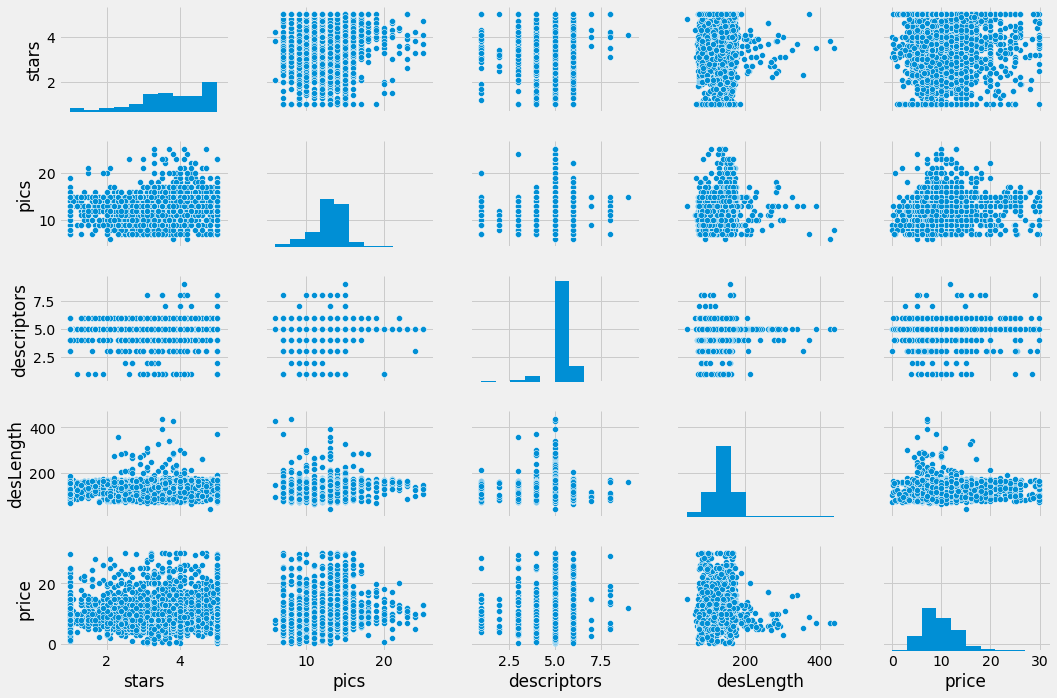

In [5]:
sns.pairplot(df, size = 2, aspect=1.5);

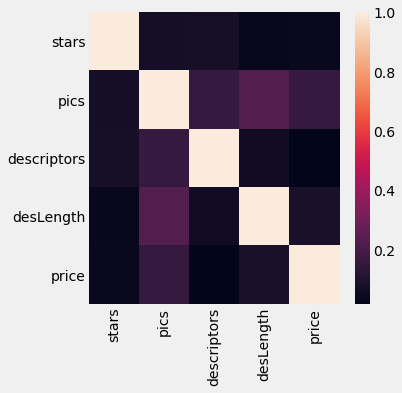

In [6]:
sns.heatmap(df.corr())

# Train-test-split

In [3]:
x=df.iloc[:,:4]
y=df.iloc[:,4:5]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
df_train=pd.DataFrame(X_train,columns=df.columns)
df_train['price']=y_train
df_test=pd.DataFrame(X_test,columns=df.columns)
df_test['price']=y_test

Note that x and y are dataframes of the full set of independent and dependent variables, respectively.  df_train / df_test are the dataframes containing the full set of training / test data.

# Baseline Model

As a baseline model we allow quadratic terms for each variable but no quadratic interactions.

In [4]:
df_train_baseline=luther.make_baseline(df_train)

y_baseline, X_baseline = patsy.dmatrices('price ~ desLength+descriptors+stars+pics +\
 pics_squared+desLength_squared+descriptors_squared', data=df_train_baseline, return_type="dataframe")

#y_baseline, X_baseline = patsy.dmatrices('price ~ desLength+descriptors+stars+pics', data=df, return_type="dataframe")

# Create your model
model_baseline = sm.OLS(y_baseline,X_baseline)
# Fit your model to your training set
fit_baseline = model_baseline.fit()
# Print summary statistics of the model's performance
fit_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     23.14
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           5.03e-31
Time:                        14:03:30   Log-Likelihood:                -12149.
No. Observations:                4268   AIC:                         2.431e+04
Df Residuals:                    4260   BIC:                         2.437e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.5061      1.491      1.681      0.093      -0.416       5.428
desLength               0.0457      0.009      5.000      0.000       0.028       0.064
descriptors            -0.9269      0.433     -2.142      0.032      -1.775      -0.078
stars                   0.1881      0.063      2.998      0.003       0.065       0.311
pics                    0.6299      0.170      3.709      0.000       0.297       0.963
pics_squared           -0.0149      0.006     -2.317      0.021      -0.027      -0.002
desLength_squared      -0.0001   3.01e-05     -4.155      0.000      -0.000   -6.61e-05
descriptors_squared     0.0878      0.048      1.832      0.067      -0.006       0.182
==============================================================================
Omnibus:                     1315.044   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4560.733
Skew:                           1.530   Prob(JB):                         0.00
Kurtosis:                       7.035   Cond. No.                     5.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
df_test_baseline=luther.make_baseline(df_test)
y_test_baseline, X_test_baseline = patsy.dmatrices('price ~ desLength+descriptors+stars+pics +\
pics_squared+desLength_squared+descriptors_squared', data=df_test_baseline, return_type="dataframe")

y_test_baseline=fit_baseline.predict(X_test_baseline)
nfeatures=X_test.shape[1]-1

np.mean(cross_val_score(LinearRegression(),X_baseline,y_baseline,cv=4,scoring="mean_squared_error"))


-17.46654450998825

In [183]:
luther.R2(y_test_baseline,y_test), luther.R2_adj(y_test_baseline,y_test,nfeatures)

(0.009293339379027987, 0.006499993531412507)

KeyError: 3228

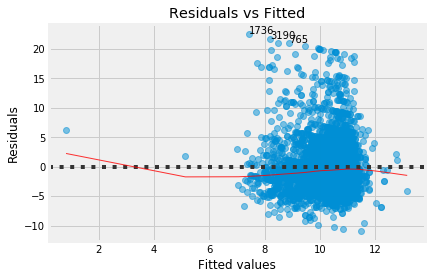

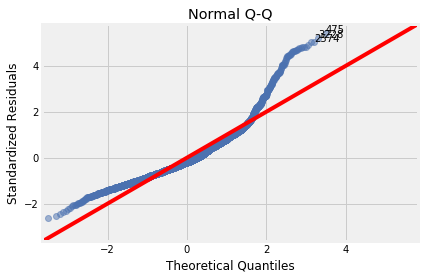

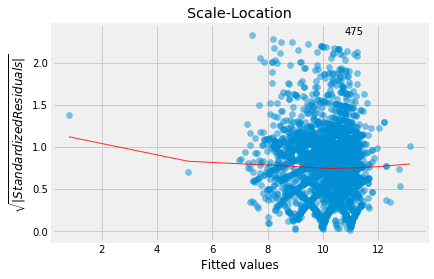

In [220]:
diagnostic_plots.diagnostic_plots(X_baseline,y_baseline)

# Other Models

## 0. Baseline Model ala sklearn

In [177]:
X_test_baseline.head()

,Intercept,desLength,descriptors,stars,pics,pics_squared,desLength_squared,descriptors_squared
1171,1.0,143.0,4.0,5.0,13.0,169.0,20449.0,16.0
1881,1.0,89.0,5.0,4.8,12.0,144.0,7921.0,25.0
3123,1.0,124.0,6.0,4.4,13.0,169.0,15376.0,36.0
815,1.0,163.0,6.0,3.9,11.0,121.0,26569.0,36.0
169,1.0,162.0,5.0,3.9,17.0,289.0,26244.0,25.0


In [186]:
model0=LinearRegression()
pipeline=make_pipeline(StandardScaler(),PolynomialFeatures(1),model0)
fit=pipeline.fit(X_baseline, y_baseline)
y_predict=fit.predict(X_baseline)
y_test_predict=fit.predict(X_test_baseline)
naive_score=fit.score(X_baseline,y_baseline)
scores = cross_val_score(fit, X_baseline, y_baseline, cv=4, scoring='mean_squared_error')
cross_val=np.mean(scores)
features=7
mse_adj=luther.R2_adj(y_predict,y_baseline,7)
mse_adj_test=luther.R2_adj(y_test_predict,y_test,features)
results0=[2,naive_score,cross_val,mse_adj,mse_adj_test]
results0

[2,
 0.03663131547747289,
 -17.466544509988253,
 0.03504831529164598,
 0.0027509369032272524]

## I. Polynomial Features

Now we systematically explore the effects of adding polynomial features.  I also plot the learning curve for one of these models.  This is merely representative of the general behavior of learning curves for this dataset.  

In [9]:
model1=LinearRegression()

results1=get_model_stats(X_train,y_train,model1,7)

Degree: 1        Naive Score: 0.03       CV -17.55         Adj R2 0.03
Degree: 2        Naive Score: 0.041      CV -17.47         Adj R2 0.041
Degree: 3        Naive Score: 0.053      CV -17.6          Adj R2 0.053
Degree: 4        Naive Score: 0.068      CV -18.65         Adj R2 0.067
Degree: 5        Naive Score: 0.092      CV -57.8          Adj R2 0.092
Degree: 6        Naive Score: 0.12       CV -4020.68       Adj R2 0.12
Degree: 7        Naive Score: 0.164      CV -3761726.47    Adj R2 0.163


In [26]:
pipeline1=make_pipeline(StandardScaler(),PolynomialFeatures(2),LinearRegression())
fit1=pipeline.fit(X_train, y_train)
y_test_predict1=fit1.predict(X_test)
np.mean(cross_val_score(pipeline1,X_train,y_train,cv=4,scoring="mean_squared_error"))


-17.466653524436737

In [68]:
R2_adj(y_test_predict1,y_test,nfeatures)

0.014849667394250532

In [197]:
poly=PolynomialFeatures(2)
X_quad=poly.fit_transform(X_train)

learning_curve(model1, X_quad, fix_row(y_train.values), train_sizes=[50, 80, 110,1000,2000], cv=5);
train_sizes, train_scores, test_scores = learning_curve(model1, X_quad, y_train, cv= 4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)
learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
learn_df

,train_size,train_score,test_score
0,320,0.089554,-0.045391
1,1040,0.047429,0.021441
2,1760,0.042654,0.020719
3,2480,0.038213,0.030129
4,3201,0.042607,0.031132


(-1, 1)

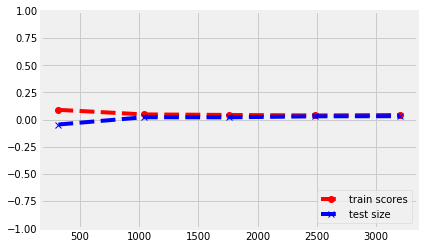

In [198]:
plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test size')
plt.legend(loc='lower right')
plt.ylim(-1,1)

## II. Lasso

In [28]:
alphas=[10**(float(i)/10) for i in np.arange(-100,10,1)]
model2=LassoCV(cv=4,alphas=alphas)
results2=get_model_stats(X_train,y_train,model2,5)

Degree: 1        Naive Score: 0.03       CV -17.55         Adj R2 0.03
Degree: 2        Naive Score: 0.04       CV -17.44         Adj R2 0.04
Degree: 3        Naive Score: 0.049      CV -17.47         Adj R2 0.049
Degree: 4        Naive Score: 0.05       CV -18.12         Adj R2 0.049
Degree: 5        Naive Score: 0.001      CV -19.63         Adj R2 -0.0


In [51]:
acc=[]
for alpha in alphas:
    lasso=Lasso(alpha).fit(X_train,y_train)
    cv=np.mean(cross_val_score(lasso,X_train,y_train,cv=4,scoring='mean_squared_error'))
    acc.append([lasso.score(X_test,y_test),lasso.score(X_train,y_train),cv])

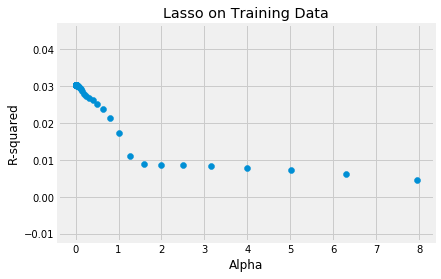

In [36]:
plt.scatter(alphas,[x[1] for x in acc])
plt.title("Lasso on Training Data")
plt.xlabel("Alpha")
plt.ylabel("R-squared")
plt.show()

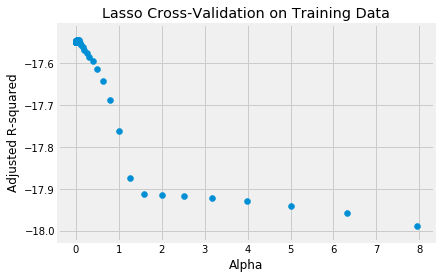

In [52]:
plt.scatter(alphas,[x[2] for x in acc])
plt.title("Lasso Cross-Validation on Training Data")
plt.xlabel("Alpha")
plt.ylabel("Adjusted R-squared")
plt.show()

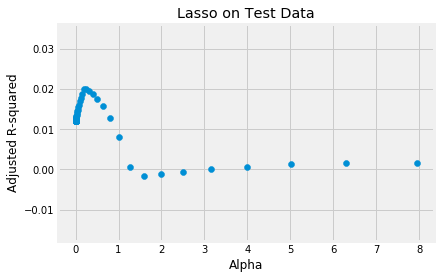

In [37]:
plt.scatter(alphas,[x[0] for x in acc])
plt.title("Lasso on Test Data")
plt.xlabel("Alpha")
plt.ylabel("Adjusted R-squared")
plt.show()

# III. Ridge

In [53]:
model3=RidgeCV(cv=4,alphas=alphas)
results3=get_model_stats(X_train,y_train,model2,5)

Degree: 1        Naive Score: 0.03       CV -17.55         Adj R2 0.03
Degree: 2        Naive Score: 0.04       CV -17.44         Adj R2 0.04
Degree: 3        Naive Score: 0.049      CV -17.47         Adj R2 0.049
Degree: 4        Naive Score: 0.05       CV -18.12         Adj R2 0.049
Degree: 5        Naive Score: 0.001      CV -19.63         Adj R2 -0.0


# IV. Log Transform of Price

In [13]:
results4=[]
for i in range(1,8):
    degree=i
    est = make_pipeline(StandardScaler(),PolynomialFeatures(degree), LinearRegression())
    log_y_train=np.log(y_train)
    fit4=est.fit(X_train, log_y_train)
    scores = cross_val_score(fit4, X_train, log_y_train, cv=4, scoring='mean_squared_error')
    log_y_predict=fit4.predict(X_train)
    log_y_test_predict=fit4.predict(X_test)
    mse_adj_test=R2_adj(np.exp(log_y_test_predict+luther.var(fix_row(log_y_test_predict))/2),y_test,4)
    mse_adj=round(R2_adj(np.exp(log_y_predict+luther.var(fix_row(log_y_predict))/2),y_train,14),3)
    results4.append([i,round(fit4.score(X_train,log_y_train),3),round(np.mean(scores),2),mse_adj,mse_adj_test])
    print(f"Degree: {i},   Naive Score: {round(fit4.score(X_train,log_y_train),3)},  Cross_Val: {round(np.mean(scores),3)},   Adj R2: {mse_adj}")
    

Degree: 1,   Naive Score: 0.058,  Cross_Val: -0.2,   Adj R2: 0.012
Degree: 2,   Naive Score: 0.078,  Cross_Val: -0.197,   Adj R2: 0.03
Degree: 3,   Naive Score: 0.086,  Cross_Val: -0.199,   Adj R2: 0.039
Degree: 4,   Naive Score: 0.103,  Cross_Val: -0.226,   Adj R2: 0.053
Degree: 5,   Naive Score: 0.129,  Cross_Val: -0.659,   Adj R2: 0.075
Degree: 6,   Naive Score: 0.162,  Cross_Val: -60.643,   Adj R2: 0.085
Degree: 7,   Naive Score: 0.208,  Cross_Val: -547547.475,   Adj R2: 0.126


We see that log transforming price does not really help.

# V. Boxcox and Transform to Gaussian

Now we try boxcox in order to remove the skew.  We also will try and force the desLength distribution to be exactly Gaussian by hand, i.e., matching CDFs

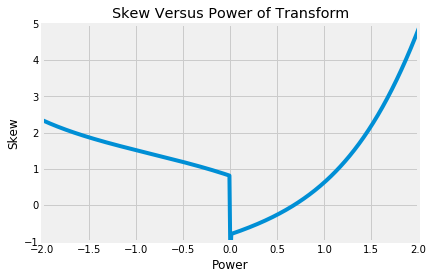

In [131]:
quad_lr=make_pipeline(PolynomialFeatures(2),LinearRegression())
power=np.arange(-2,4,.01)
skew=[]
skew_acc=[]
adj_r2=[]

for k in np.arange(-2,4,.01):
    skew.append(stats.skew(df['desLength'].apply(lambda x: x**k)))
    df_train5=df_train
    df_test5=df_test
    df_train5['dL_transformed_unskew']=df_train['desLength'].apply(lambda x: x**k)
    df_test5['dL_transformed_unskew']=df_test['desLength'].apply(lambda x: x**k)
    df_skew=df_train5.drop(['desLength'],axis=1)
    df_test_skew=df_test5.drop(['desLength'],axis=1)
    x_skew=df_train5[['stars','pics','descriptors','dL_transformed_unskew']]
    x_test_skew=df_test5[['stars','pics','descriptors','dL_transformed_unskew']]
    fit_skew=quad_lr.fit(x_skew,y_train)
    fit_test_skew=quad_lr.fit(x_test_skew,y_test)
    adj_r2.append([R2_adj(y_train,fit_skew.predict(x_skew),4),R2_adj(y_test,fit_skew.predict(x_test_skew),4)])
    scores = cross_val_score(quad_lr, x_skew, y_train, cv=4, scoring='mean_squared_error')
    skew_acc.append((k,np.mean(scores)))
    
    
skew_x=[x[0] for x in skew_acc]
skew_y=[x[1] for x in skew_acc]
    
skew_min=sorted(zip(power,np.array(skew)**2),key=(lambda x: x[1]))[0]
k_opt=skew_x[skew_y.index(max(skew_y))]

plt.plot(power,skew)
plt.xlabel('Power')
plt.ylabel('Skew')
plt.xlim(-2,2)
plt.ylim(-1,5)
plt.title("Skew Versus Power of Transform")
plt.show()

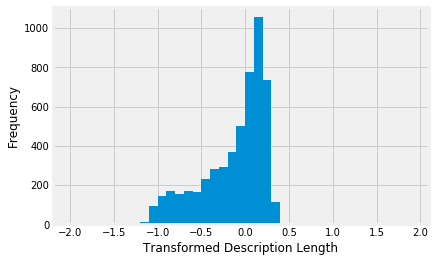

In [59]:
def transform(x):
    return x**skew_min[0]

plt.hist(df['desLength'].apply(transform).apply(lambda x: (x-30)/10),bins=np.arange(-2,2,.1))
plt.xlabel("Transformed Description Length")
plt.ylabel("Frequency")
plt.show()

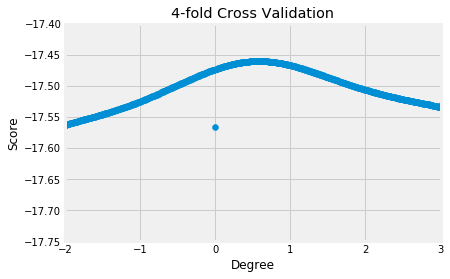

In [66]:
skew_x=[x[0] for x in skew_acc]
skew_y=[x[1] for x in skew_acc]


plt.scatter(skew_x, skew_y)
plt.title('4-fold Cross Validation')
plt.xlabel('Degree')
plt.ylabel("Score")
plt.xlim(-2,3)
plt.ylim(-17.75,-17.4)
plt.show()

In [126]:
k_opt=skew_x[skew_y.index(max(skew_y))]

### Transforming to Gaussian

So indeed, the cross validated score and r-squared score are optimal near the place where the skew is minimal.  However, the score is still not very good.  We can go futher and make_ppf and make_cdf in order to convert the description length to gaussian.  We'll then fit the model and transform back in order to get the adjusted r-squared.

In [138]:
a=X_train['desLength']
at=X_test['desLength']
vals = make_vals(a,1000)

def transform(x):
    return norm.ppf(make_cdf(vals,x))

def inv_transform(x):
    return make_ppf(a,norm.cdf(x,1))


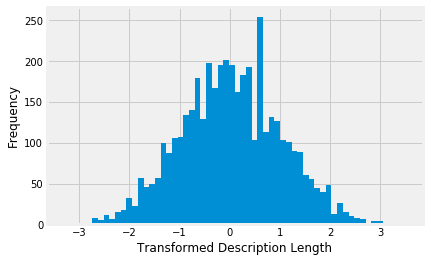

In [139]:
x5=a.apply(transform)
xt5=at.apply(transform)
x5df=pd.DataFrame(x5)
xt5df=pd.DataFrame(xt5)
x5df['price']=y_train
xt5df['price']=y_test
x5dfn=x5df[abs(x5df.desLength) <10]
xt5dfn=xt5df[abs(xt5df.desLength)<10]
plt.hist(x5dfn['desLength'].values,bins=60)
plt.xlabel('Transformed Description Length')
plt.ylabel('Frequency')
plt.show()

In [149]:
bla=pd.DataFrame([1 for _ in range(len(xt5dfn))])
xt5dfn.head()

,desLength,price
1171,-0.202829,7.99
1881,-1.570866,11.99
3123,-0.697527,8.88
815,0.954684,8.99
169,0.842961,10.99


In [152]:
est = make_pipeline(LinearRegression())
y5=x5dfn['price'].values
yt5=xt5dfn['price'].values
x5dfn2=x5dfn.drop(['price'],axis=1)
xt5dfn2=xt5dfn.drop(['price'],axis=1)
fit5=est.fit(x5dfn2,y5)
ytp5=est.predict(xt5dfn2)
z5=[ytp5[i]-yt5[i] for i in range(len(ytp5))]
R2(ytp5,yt5)

-0.0008665593422241269

In [157]:
results5n=[]
for i in range(1,8):
    degree=i
    est = make_pipeline(StandardScaler(),PolynomialFeatures(degree), LinearRegression())
    y5=x5dfn['price'].values
    yt5=xt5dfn['price'].values
    fit5=est.fit(x5dfn2,y5)
    
    scores = np.mean(cross_val_score(fit5,x5dfn2,y5, cv=4, scoring='mean_squared_error'))
    y_predict=fit5.predict(x5dfn2)
    y_test_predict=fit5.predict(xt5dfn2)
    mse_adj_test=round(R2_adj(y_test_predict,yt5,14),3)
    mse_adj=round(R2_adj(y_predict,y5,14),3)
    s5=fit5.score(x5dfn2,y5)                       
    results5n.append([i,round(s5,3),round(np.mean(scores),2),mse_adj,mse_adj_test])
    print(f"Degree: {i},   Naive Score: {round(s5,3)},  Cross_Val: {round(np.mean(scores),3)},   Adj R2: {mse_adj}")
    

Degree: 1,   Naive Score: 0.012,  Cross_Val: -17.85,   Adj R2: 0.009
Degree: 2,   Naive Score: 0.017,  Cross_Val: -17.762,   Adj R2: 0.014
Degree: 3,   Naive Score: 0.018,  Cross_Val: -17.754,   Adj R2: 0.015
Degree: 4,   Naive Score: 0.018,  Cross_Val: -17.745,   Adj R2: 0.015
Degree: 5,   Naive Score: 0.02,  Cross_Val: -17.726,   Adj R2: 0.017
Degree: 6,   Naive Score: 0.021,  Cross_Val: -17.72,   Adj R2: 0.017
Degree: 7,   Naive Score: 0.021,  Cross_Val: -17.719,   Adj R2: 0.018


No improvement over the original quadratic features model.

## Model VI: Dropping Large Influence Points.

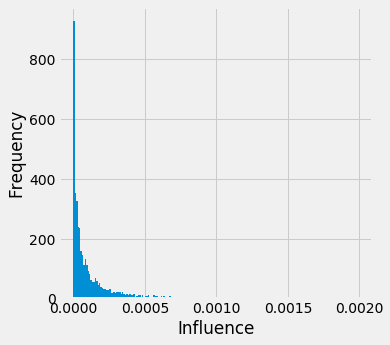

In [169]:
model_fit=sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_cooks=model_fit.get_influence().cooks_distance[0]

simple_model_fit=sm.OLS(y_train, sm.add_constant(X_train)).fit()
simple_model_cooks=simple_model_fit.get_influence().cooks_distance[0]

plt.hist(model_cooks,bins=np.arange(0,.002,.00001))
plt.xlabel("Influence")
plt.ylabel("Frequency")
plt.show()

In [179]:
df6=df_train
df6['leverage']=model_cooks
df6.head()

,stars,pics,descriptors,desLength,price,leverage
2991,4.2,16.0,5.0,160.0,6.88,0.000157
1748,5.0,13.0,5.0,169.0,16.95,0.000372
4700,2.6,15.0,5.0,153.0,8.99,0.000023
2242,4.2,15.0,5.0,159.0,9.99,0.000006
2831,4.1,17.0,5.0,77.0,7.99,0.000248


In [183]:
lst=np.linspace(.00001,.001,100)
sql = make_pipeline(StandardScaler(),PolynomialFeatures(2), LinearRegression())
simple_quad_scores=[]

for x in lst:
    df6s2=df6[df6.leverage<x]
    df6s3=df6s2.drop(['leverage'],axis=1)
    n=len(df6s3)
    x_simp6=df6s3.iloc[:,:4]
    y_simp6=df6s3.iloc[:,4:5]
    fit_simp6=sql.fit(x_simp6, y_simp6)
    y_simp_predict6=fit_simp6.predict(x_simp6)
    mse_adj=round(R2_adj(y_simp_predict6,y_simp,14),3)
    score = cross_val_score(fit_simp6, x_simp6, y_simp6, cv=4, scoring='mean_squared_error')
    simple_quad_scores.append([x,round(fit_simp6.score(x_simp6,y_simp6),3),round(np.mean(score),2),mse_adj,n])


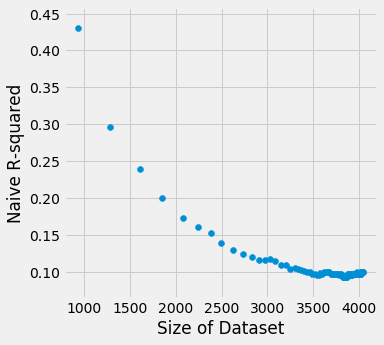

In [184]:
naive=[x[1] for x in simple_quad_scores]
cross_val=[x[2] for x in simple_quad_scores]
r2adj=[x[3] for x in simple_quad_scores]
size=[x[4] for x in simple_quad_scores]
plt.scatter(size,naive)
plt.xlabel("Size of Dataset")
plt.ylabel("Naive R-squared")
plt.show()

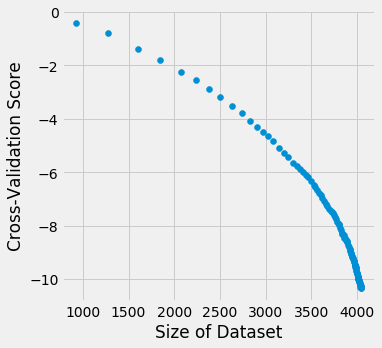

In [185]:
plt.scatter(size,cross_val)
plt.xlabel("Size of Dataset")
plt.ylabel("Cross-Validation Score")
plt.show()

## VII.  Random Forest Regressor

So far, linear regression has not done so well.  Let's try some non-linear models.

In [158]:
model7=RandomForestRegressor(n_estimators=5)

results7=get_model_stats(X_train,y_train,model7,6)

Degree: 1        Naive Score: 0.661      CV -22.52         Adj R2 0.661
Degree: 2        Naive Score: 0.658      CV -22.26         Adj R2 0.657
Degree: 3        Naive Score: 0.663      CV -21.7          Adj R2 0.663
Degree: 4        Naive Score: 0.645      CV -21.96         Adj R2 0.645
Degree: 5        Naive Score: 0.667      CV -22.54         Adj R2 0.666
Degree: 6        Naive Score: 0.659      CV -22.71         Adj R2 0.659


In [188]:
param_dict={'n_estimators':np.array(range(1,21,1))}
GSCV=GridSearchCV(RandomForestRegressor(),param_dict)
GSCV.fit(X_train,y_train)
gscv_model=GSCV.best_estimator_

In [189]:
GSCV.best_params_

{'n_estimators': 20}

In [190]:
GSCV.cv_results_['mean_test_score'][18]

-0.16219581884641268

In [192]:
y_gscv_predict=gscv_model.predict(X_train)
R2_adj(y_train.values,y_gscv_predict,4)

0.4173814346540884

In [194]:
y_gscv_test=gscv_model.predict(X_test)
R2(y_gscv_test,y_test)

-0.0837391004149326

## VIII.  Gradient Boosted Regressor

In [204]:
from sklearn.ensemble import GradientBoostingRegressor

model8 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls')

fit8=model8.fit(X_train,y_train)

results8=get_model_stats(X_train,y_train,model8,4)

Degree: 1        Naive Score: 0.055      CV -17.26         Adj R2 0.054
Degree: 2        Naive Score: 0.064      CV -17.3          Adj R2 0.064
Degree: 3        Naive Score: 0.068      CV -17.42         Adj R2 0.068
Degree: 4        Naive Score: 0.072      CV -17.41         Adj R2 0.071


In [205]:
param_dict={'n_estimators':np.array(range(1,21,1))}
GSCV2=GridSearchCV(GradientBoostingRegressor(),param_dict)
GSCV2.fit(X_train,y_train)
gscv2_model=GSCV2.best_estimator_

In [206]:
y_gscv2_train=gscv2_model.predict(X_train)
R2(y_gscv2_train,y_train)

0.07419738065677695

In [209]:
y_gscv2_test=gscv2_model.predict(X_test)
R2(y_gscv2_test,y_test)

0.031030598342005833

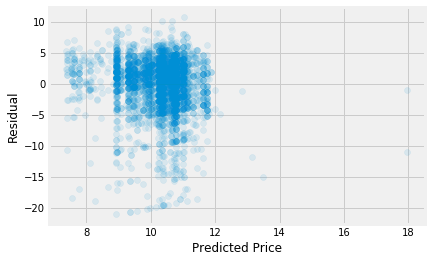

In [217]:
z_gscv=[y_gscv2_train[i]-fix_row(y_train.values)[i] for i in range(len(y_train))]
plt.scatter(y_gscv2_train,z_gscv,alpha=.1)
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.show()

## Conclusions

The gradient boosted regressor turn out to be the best model.  This disagrees with what was stated in my talk since I just obtained this result after modifying the range of meta parameters.

|   | R2  | CV  | Test R2 |
|---|---|---|---|
|Baseline|.037|-17.466|.0065|
|Polynomial| .041| -17.47| .0148|
|Ridge+Lasso|.04|-17.44|.0148|
|Log Price | .002|-.197| -.33|
|Gaussian Transform|.021|-17.19|.018|
|RandomForest|.662|-22.09|-.084|
|Gradient Boost|.064|-17.3|.03
